In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import ticker

In [6]:
dirname = './lzb-hwp-tests-1-22/'
angles = np.arange(0, 190, 10, dtype=int)

In [7]:
means = np.zeros((2, len(angles)))
stds  = np.zeros((2, len(angles)))

i = 0
for a in angles: 
    data = np.loadtxt(os.path.join(dirname, f'{a}-{a}.txt'))
    mean_b = np.mean(data, axis=0)[1]
    std_b  = np.std(data, axis=0)[1]
    mean_bp = np.mean(data, axis=0)[3]
    std_bp  = np.std(data, axis=0)[3]
    means[0, i] = mean_b
    stds[0, i]  = std_b
    means[1, i] = mean_bp
    stds[1, i]  = std_bp

    i += 1

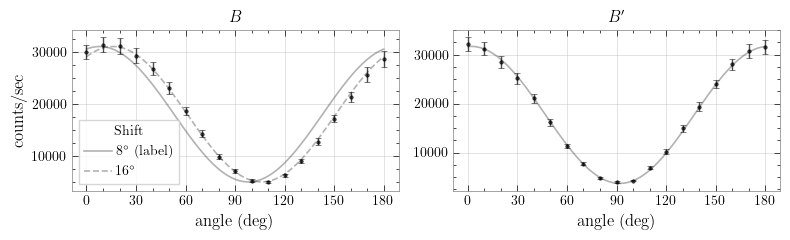

In [9]:
fig, ax = plt.subplots(ncols=2,
                       figsize=(8,2.5))

acont = np.linspace(0, 180, 100)

bshift_1 = 8
bshift_2 = 16
bpshift = 2

fits = [26000 * np.cos(np.pi * (acont - bshift_1) / 180)**2 + 5000, 
        28000 * np.cos(np.pi * (acont - bpshift) / 180)**2 + 3700]

corrected_fit = 26000 * np.cos(np.pi * (acont - bshift_2) / 180) ** 2 + 5000

titles = ["$B$", "$B'$"]

for i in range(2):
        ax[i].errorbar(angles, means[i, :], yerr=stds[i, :], 
                    fmt='o', 
                    ms=2.5, 
                    alpha=0.7,
                    capsize=2, 
                    color='black', linewidth=1)

        ax[i].plot(acont, fits[i], color='black', alpha=0.3, lw=1.2, label='$8^\\circ$ (label)') 

        if i == 0:
            ax[i].plot(acont, corrected_fit, color='black', alpha=0.3, linestyle='dashed', lw=1.2, label=f'${bshift_2}^\\circ$') 
            ax[i].legend(loc='lower left', title='Shift', frameon=True, fancybox=False)

        ax[i].xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(10))

        ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(2500))

        ax[i].set_xlabel('angle (deg)')
        ax[i].set_title(titles[i])

        if i == 0: 
              ax[i].set_ylabel('counts/sec')

plt.tight_layout()
plt.savefig('./fig/hwps.pdf')
plt.savefig('./fig/hwps.png')